# **3. Classification_MNIST**
* 핸즈온 머신러닝 3장

* MNIST 데이터를 활용해서 Classifier 만들기.

In [6]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mnist = fetch_openml('mnist_784', as_frame=False)

## **1. MNIST Data**

* 0~9까지 숫자가 써진 이미지 데이터

In [7]:
X, y = mnist.data, mnist.target
print(f"X shape :{X.shape}")
print(f"X sample shape : {X[0].shape}")
print(f"y type : {type(y[0])}")
print(f"y shape : {y.shape}")

X shape :(70000, 784)
X sample shape : (784,)
y type : <class 'str'>
y shape : (70000,)


In [8]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X, y = mnist.data, mnist.target
print(f"X shape :{X.shape}")
print(f"X sample shape : {X[0].shape}")
print(f"y type : {type(y[0])}")
print(f"y shape : {y.shape}")

X shape :(70000, 784)
X sample shape : (784,)
y type : <class 'str'>
y shape : (70000,)


###  **샘플 시각화**

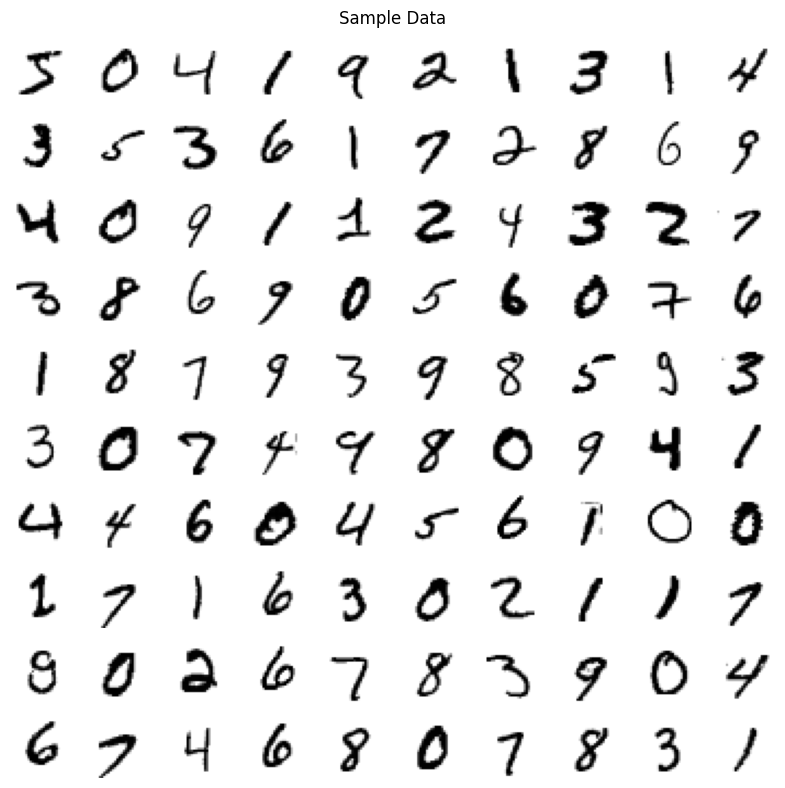

In [10]:
fig, axs = plt.subplots(10,10, figsize=(8,8))
fig.suptitle('Sample Data')

for i in range(100):
    r,c = divmod(i,10)
    axs[r,c].imshow(X[i].reshape(28,28), cmap='gray_r')
    axs[r,c].axis('off')

plt.subplots_adjust(0,0)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

y = y.astype(np.int8) # 라벨 인코더를 통해서 인코딩을 해도 된다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# * warm_start=True -> 모델을 확장하면서 학습 가능
clf1 = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)

# * tqdm으로 학습 진행 상황을 시각화
n_estimators = 100
for i in tqdm(range(1, n_estimators+1)):
    clf1.n_estimators = i
    clf1.fit(X_train, y_train)

100%|██████████| 100/100 [00:46<00:00,  2.13it/s]


## **2. Model Evalutation**

### **클래스 별 Score 확인**
* Classification에서는 Confusion Matrix에 있는 요소들을 활용해서 모델을 평가한다.

  * **TP (True Positives)**: 모델이 긍정 클래스를 정확하게 예측한 경우.
  
  * **TN (True Negatives)**: 모델이 부정 클래스를 정확하게 예측한 경우.
  
  * **FP (False Positives)**: 모델이 부정 클래스를 긍정 클래스로 잘못 예측한 경우.
  
  * **FN (False Negatives)**: 모델이 긍정 클래스를 부정 클래스로 잘못 예측한 경우.

In [14]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Accuracy: {accuracy:.3f}")

print("\nClassification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):
        f1_score = metrics['f1-score']
        print(f"Class {label}: F1-Score = {f1_score:.3f}")

Accuracy: 0.967

Classification Report:
Class 0: F1-Score = 0.985
Class 1: F1-Score = 0.983
Class 2: F1-Score = 0.959
Class 3: F1-Score = 0.956
Class 4: F1-Score = 0.966
Class 5: F1-Score = 0.966
Class 6: F1-Score = 0.981
Class 7: F1-Score = 0.967
Class 8: F1-Score = 0.955
Class 9: F1-Score = 0.952
Class macro avg: F1-Score = 0.967
Class weighted avg: F1-Score = 0.967


* F1 Score가 거의 1에 가까운 모델이다.

* 실전에서 다양한 데이터가 들어오는 것을 고려해서 다음 학습 데이터에는 X에 Morphological Operation을 사용해서 글씨를 알아보기 힘들게 해서 비교해보자.

* 또한, 회전 등 다른 augmentation을 가해주자.

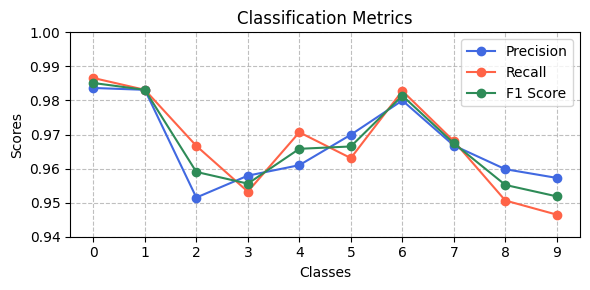

In [15]:
metrics = {
    'Precision': ([report[str(i)]['precision'] for i in range(10)], 'royalblue'),
    'Recall': ([report[str(i)]['recall'] for i in range(10)], 'tomato'),
    'F1 Score': ([report[str(i)]['f1-score'] for i in range(10)], 'seagreen')
}

plt.figure(figsize=(6,3))

for label, (data, color) in metrics.items():
    plt.plot(range(10), data, marker='o', label=label, color=color)

plt.xlabel('Classes')
plt.xticks(range(10))
plt.ylabel('Scores')
plt.ylim([0.94,1])
plt.title('Classification Metrics')
plt.legend()

plt.grid(linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

* 각 class마다 precision과 recall이 어떤 식으로 변화하는지 시각화해봤다.

* 불필요한 과정이긴 한데, F1-Score가 Precision, Recall과 어떤 관계가 있는지 볼 수 있다.

### **Macro vs weighted**
* 각 클래스 별 균형잡힌 데이터 셋이라면 Macro를, 불균형한 데이터 셋이면 weighted를 사용한다.

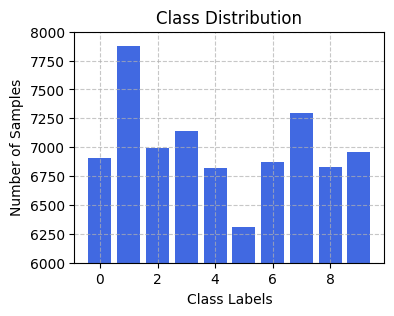

In [16]:
unique, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(4,3))
plt.bar(unique, counts, color='royalblue')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.ylim([6000,8000])
plt.grid(linestyle='--', alpha=0.7)
plt.title('Class Distribution')
plt.show()

* 각 클래스들이 평균치 7천에서 크게 차이가 나지 않는다.

* 성능 차이는 없지만, 굳이 고르자면 Macro를 선택하자.

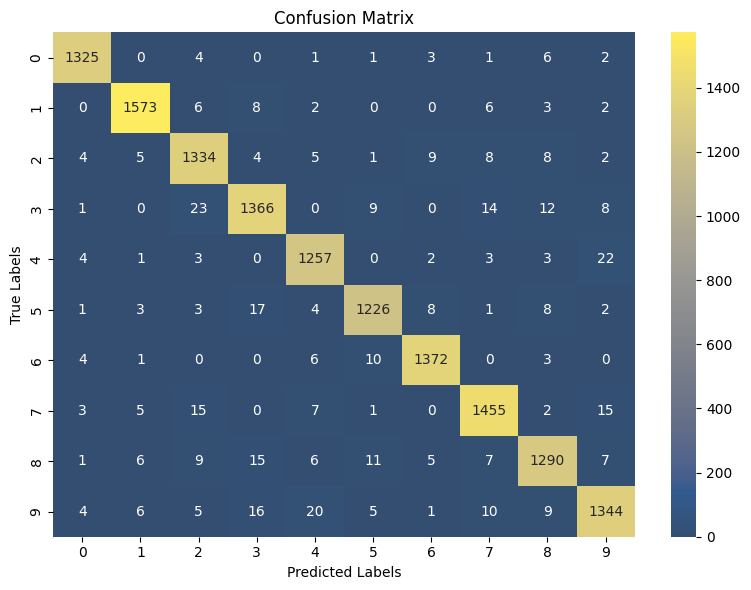

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=True, alpha=0.8,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [18]:
cm = confusion_matrix(y_test, y_pred)

TP = cm.diagonal()  # 주대각
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2*precision*recall / (precision+recall)
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")

Precision: [0.98366741 0.983125   0.95149786 0.95792426 0.96100917 0.96993671
 0.98       0.96677741 0.95982143 0.95726496]
recall: [0.98659717 0.983125   0.96666667 0.95324494 0.97065637 0.96307934
 0.98280802 0.96806387 0.95062638 0.94647887]
f1_score: [0.98513011 0.983125   0.95902229 0.95557887 0.96580868 0.96649586
 0.981402   0.96742021 0.95520178 0.95184136]


* Bianry Classification과 마찬가지로 Confusion Matrix를 읽으면 된다.

## **3. Data Agumentation**

### **Pipeline 설계**

* rotation, flip, affine transform 등 이미지에 여려 변화를 줄 수 있는 방법을 사용한다.

* 필체 데이터라서 Morphological Operation을 사용해서 글씨의 테두리에 대해서 변형을 주었다.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from PIL import Image
import random
import cv2

# step 1: 원본 이미지가 flatten된 벡터이므로 이미지 형태로 변경
def reshape28(img):
    return img.reshape(28,28).astype(np.uint8)

# step 2: 글씨체 두께에 영향을 주기 위해 Morphological Operation을 확률적으로 가함.
def morphological_operation(img):
    p = random.random()
    if p < 0.4:
        return img
    elif p < 0.7:
        return cv2.erode(img, np.ones((3,3), np.uint8), iterations=1)
    else:
        return cv2.dilate(img, np.ones((3,3), np.uint8), iterations=1)

# step 3: 글씨 각도에 영향을 주기 위해 Rotation
def rotation(img):
    img = Image.fromarray(img)
    angle = random.uniform(-20,20)
    return np.array(img.rotate(angle)).astype(np.uint8).flatten()

# step 4: 하나의 파이프라인으로 설계
pipeline = Pipeline(steps=[
    ('reshape28', FunctionTransformer(func=reshape28, validate=False)),
    ('morphological', FunctionTransformer(func=morphological_operation, validate=False)),
    ('rotation', FunctionTransformer(func=rotation, validate=False))
])

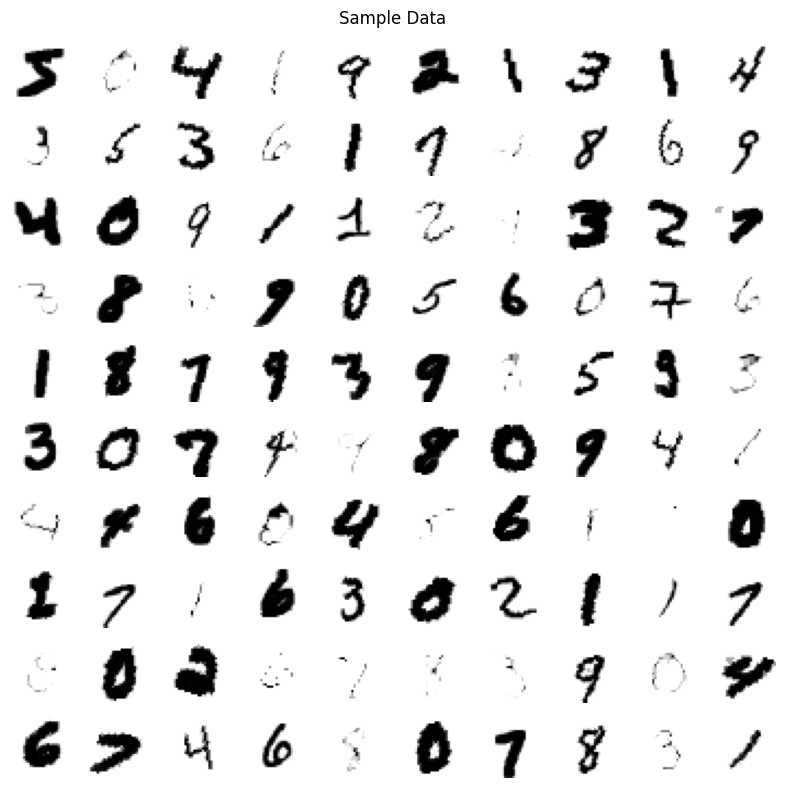

In [21]:
X_transformed = [pipeline.fit_transform(x) for x in X]

fig,ax = plt.subplots(10,10, figsize=(8,8))
fig.suptitle('Sample Data')

for i in range(100):
    r,c = divmod(i,10)
    ax[r,c].imshow(X_transformed[i].reshape(28,28), cmap='gray_r')
    ax[r,c].axis('off')

plt.subplots_adjust(0,0)
plt.tight_layout()
plt.show()

### **1. 변형된 데이터에 대한 예측값**

* Data Agumentation을 적용하면 정답률이 상당히 떨어진다.

* 다양한 데이터에 대해서 학습할 수 있게 새로운 Classifier를 사용한다.

In [22]:
y = y.astype(np.int8) # 라벨 인코더를 통해서 인코딩을 해도 된다.
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

y_pred = clf1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Accuracy: {accuracy:.3f}")

print("\nClassification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):
        f1_score = metrics['f1-score']
        print(f"Class {label}: F1-Score = {f1_score:.3f}")

Accuracy: 0.778

Classification Report:
Class 0: F1-Score = 0.873
Class 1: F1-Score = 0.869
Class 2: F1-Score = 0.846
Class 3: F1-Score = 0.810
Class 4: F1-Score = 0.798
Class 5: F1-Score = 0.724
Class 6: F1-Score = 0.858
Class 7: F1-Score = 0.668
Class 8: F1-Score = 0.648
Class 9: F1-Score = 0.719
Class macro avg: F1-Score = 0.781
Class weighted avg: F1-Score = 0.782


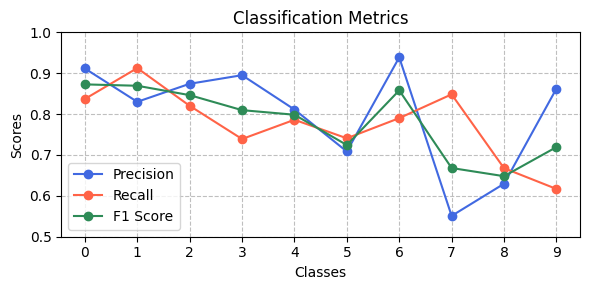

In [23]:
metrics = {
    'Precision': ([report[str(i)]['precision'] for i in range(10)], 'royalblue'),
    'Recall': ([report[str(i)]['recall'] for i in range(10)], 'tomato'),
    'F1 Score': ([report[str(i)]['f1-score'] for i in range(10)], 'seagreen')
}

plt.figure(figsize=(6,3))

for label, (data, color) in metrics.items():
    plt.plot(range(10), data, marker='o', label=label, color=color)

plt.xlabel('Classes')
plt.xticks(range(10))
plt.ylabel('Scores')
plt.ylim([0.5,1])
plt.title('Classification Metrics')
plt.legend()

plt.grid(linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

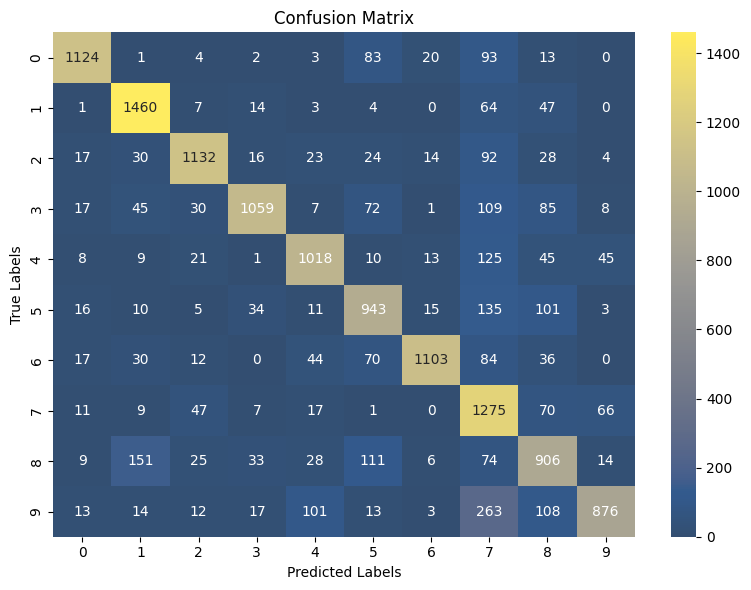

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=True, alpha=0.8,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

### **2. 변형된 데이터를 사용해서 학습한 경우**

* 변형된 데이터를 사용한 경우, 기존의 결과보다 F1 score가 6% 하락했다.

* 하지만, Model의 Robust는 증가했으므로, 단순 F1 Score로 비교는 어렵다.

In [25]:
# * warm_start=True -> 모델을 확장하면서 학습 가능
clf2 = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)

# * tqdm으로 학습 진행 상황을 시각화
n_estimators = 100
for i in tqdm(range(1, n_estimators+1)):
    clf2.n_estimators = i
    clf2.fit(X_train, y_train)

100%|██████████| 100/100 [00:50<00:00,  1.97it/s]


In [26]:
y_pred = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Accuracy: {accuracy:.3f}")

print("\nClassification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):
        f1_score = metrics['f1-score']
        print(f"Class {label}: F1-Score = {f1_score:.3f}")


Accuracy: 0.901

Classification Report:
Class 0: F1-Score = 0.955
Class 1: F1-Score = 0.947
Class 2: F1-Score = 0.901
Class 3: F1-Score = 0.878
Class 4: F1-Score = 0.883
Class 5: F1-Score = 0.876
Class 6: F1-Score = 0.931
Class 7: F1-Score = 0.907
Class 8: F1-Score = 0.862
Class 9: F1-Score = 0.864
Class macro avg: F1-Score = 0.900
Class weighted avg: F1-Score = 0.901


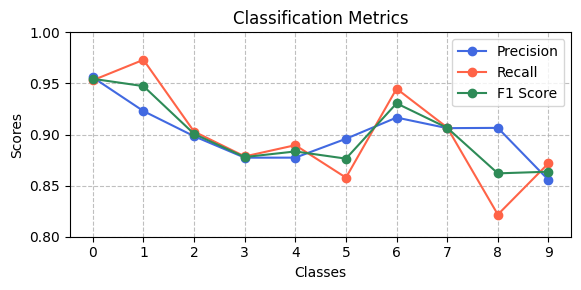

In [27]:
metrics = {
    'Precision': ([report[str(i)]['precision'] for i in range(10)], 'royalblue'),
    'Recall': ([report[str(i)]['recall'] for i in range(10)], 'tomato'),
    'F1 Score': ([report[str(i)]['f1-score'] for i in range(10)], 'seagreen')
}

plt.figure(figsize=(6,3))

for label, (data, color) in metrics.items():
    plt.plot(range(10), data, marker='o', label=label, color=color)

plt.xlabel('Classes')
plt.xticks(range(10))
plt.ylabel('Scores')
plt.ylim([0.8,1])
plt.title('Classification Metrics')
plt.legend()

plt.grid(linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

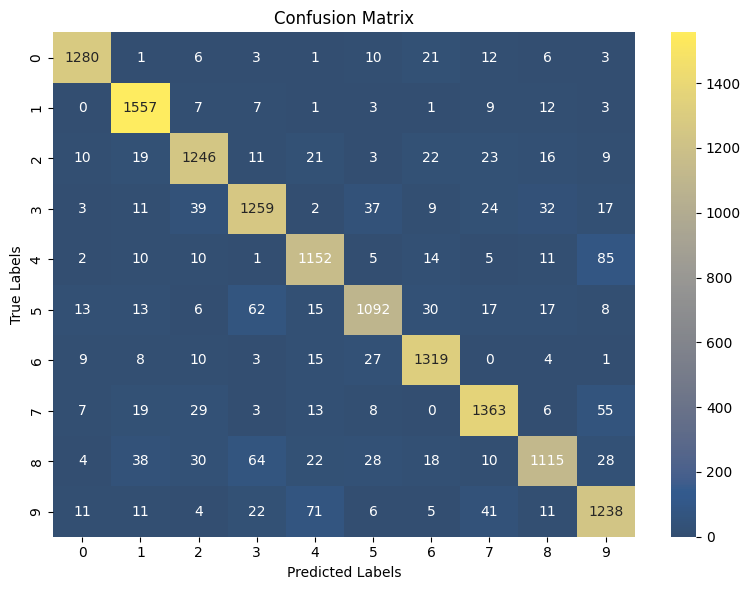

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=True, alpha=0.8,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

## **4. Model Tuning**
* 앞에서 설계했던 model의 하이퍼파라미터에 변화를 주면서 최적의 모델을 찾는다.

* cross validation, parameter grid search를 통해서 검증을 진행한다.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'n_estimators': [100, 200, 300],    # 트리 개수
    'max_depth': [10, 15, 20],          # 트리 최대 깊이
    'min_samples_split': [5, 10],    # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],       # 리프 노드가 되기 위한 최소 샘플 수
    'max_features': ['sqrt', 'log2']
}

clf3 = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=clf3, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.8981
Test Accuracy: 0.9005
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1343
           1       0.92      0.97      0.94      1600
           2       0.91      0.90      0.91      1380
           3       0.88      0.87      0.87      1433
           4       0.88      0.89      0.89      1295
           5       0.87      0.87      0.87      1273
           6       0.92      0.94      0.93      1396
           7       0.90      0.91      0.90      1503
           8       0.90      0.83      0.87      1357
           9       0.85      0.87      0.86      1420

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



In [31]:
from google.colab import drive
import joblib

drive.mount('/content/drive')

joblib.dump(best_model, '/content/drive/MyDrive/coding/ML/handson_ml/save_model/3_MNIST_RFclf_best.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/coding/ML/handson_ml/save_model/3_MNIST_RFclf_best.pkl']